# Identity 

* [Wikipedia - Activation function](https://en.wikipedia.org/wiki/Activation_function)

#### Function

$$ f(x) = x $$

#### Derivative of the Identity function

$$ f^{\prime}(x) = 1 $$

In [16]:
%pylab inline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

Populating the interactive namespace from numpy and matplotlib


### Data

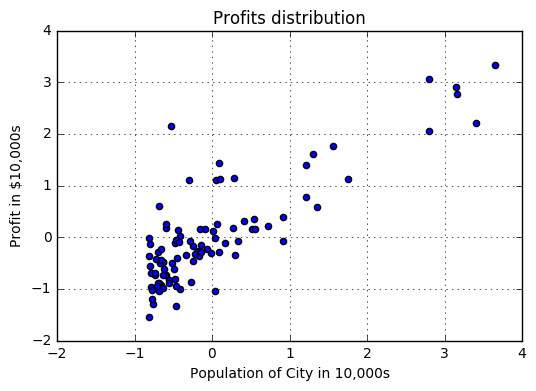

In [34]:
data = np.loadtxt('../../data/linear-regression/ex1data1.txt', delimiter=',')
X = data[:, 0].reshape(data[:, 0].shape[0], 1) # Population
Y = data[:, 1].reshape(data[:, 1].shape[0], 1) # profit

# Standardization
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
Y = scaler_y.fit_transform(Y)

scatter(X, Y)
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in $10,000s')
grid()

In [23]:
def identity(x):
    return x

def didentity(x):
    return 1


Mean Squared Error (less is good): 1.0
Mean Squared Error (less is good): 1.0
Mean Squared Error (less is good): 1.0
Mean Squared Error (less is good): 1.0
Mean Squared Error (less is good): 1.0
Mean Squared Error (less is good): 1.0
Mean Squared Error (less is good): 0.906284030982
Mean Squared Error (less is good): 0.809999104304
Mean Squared Error (less is good): 0.725250038743


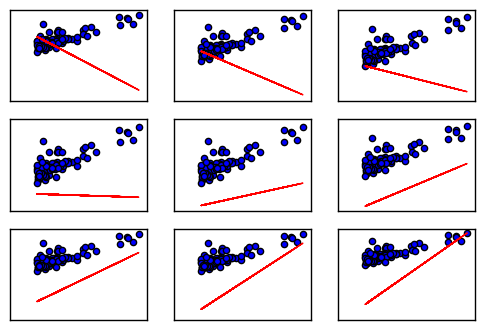

In [35]:
w = np.array([-0.1941133,  -2.07505268])

def predict(w, X):
    N = len(X)
    yhat = w[1:].dot(X.T) + w[0]
    yhat = yhat.reshape(X.shape)
    return identity(yhat)

def sgd(X, Y, w, eta=0.1):
    N = len(X)
    for _ in range(3):
        for i in range(N):
            # Sample
            x = X[i]
            y = Y[i]
            
            # P
            yhat = predict(w, x)
            delta = y - didentity(yhat)

            w_delta = 2/N * np.sum(-delta * x)
            b_delta = 2/N * np.sum(-delta)

            w[1:] = w[1:] - eta * w_delta
            w[0] = w[0] - eta * b_delta
    return w
    


for i in range(1, 10):
    w = sgd(X, Y, w)
    yhat = predict(w, X)
    
    axes = subplot(3, 3, i)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    
    scatter(X, Y)
    plot(X, yhat, color='red')
    grid()
    axes.grid()
    
    yhats = np.where(yhat >= 0.5, 1, 0)
    accuracy = mean_squared_error(Y, yhats)
    print('Mean Squared Error (less is good):', accuracy)